# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

### Инструкция по выполнению проекта

* Загрузите и подготовьте данные. Поясните порядок действий.

* Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

* Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

* Проведите финальное тестирование.

### Описание данных
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»)

#### Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

#### Целевой признак
* Exited — факт ухода клиента

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
try: 
    data = pd.read_csv('churn.csv')
except: 
    data = pd.read_csv('/datasets/Churn.csv')
rnd = 12345

Выполним предобработку данных

In [3]:
RND = 12345
data 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# пропуски 
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns = data.columns.str.lower()
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [8]:
data.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [9]:
data.is_active_member.value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

Типы данных соответствуют своим столбцам. Названия столбцов были приведены к нижнему регистру с нижним подчеркиванием. Сразу можно заметить, что присутствует дисбаланс классов. Кол-во оставшихся / кол_во ушедших ~ 80% / 20%. Еще есть пропуски в колонке Tenure (9%), нужно будет заполнить их медианными значениями, чтобы модель работала. 

* ### Разделим выборки на обучающую, валидационную и тестовую в отношении 60% / 20% / 20%. Также разделим наши данные на features и target

In [10]:
target = data.exited
features = data.drop('exited', axis=1)

features1, features_test, target1, target_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=RND)

features_train, features_valid, target_train, target_valid = train_test_split(
    features1, target1, test_size=0.25, stratify=target1, random_state=RND)



In [11]:
# features_valid.info()
len(target_valid)

2000

## Обработка признаков
* В нашем датасете есть столбцы, которые никак не влияют на результат: row_number, customer_id, surname, их не нужно включать в обработку. 


* Столбцы с численными значениями: credit_score, age, tenure, balance, num_of_products, estimated_salary. Эти значения нужно масштабировать. 


* Столбцы с классифицирующими значениями: geography, gender, has_cr_card, is_active_member. Причем столбцы geography, gender нужно преобразовать методом OHE. 

###### Функция для преобразования признаков в обучающей выборке (масштабирует, добавляет фиктивные переменные, перемешивает)

In [12]:
def transform_train(features, target): 
    numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
    classifier = ['geography', 'gender', 'has_cr_card', 'is_active_member']
    features['tenure']= features['tenure'].fillna(features['tenure'].median())
    
    df_numeric = features[numeric].copy()
    df_classifier = features[classifier].copy()

    scaler = StandardScaler()
    scaler.fit(df_numeric)
    df_numeric = pd.DataFrame(scaler.transform(df_numeric))
    df_numeric.columns = numeric  
    
    df_classifier = pd.get_dummies(df_classifier, columns=['geography', 'gender'], drop_first=True).reset_index(drop=True)
    
    new_features = df_classifier.join(df_numeric)
    target = target.reset_index(drop=True)
    
    new_features, new_target = shuffle(new_features, target, random_state=RND)
    return new_features, new_target, scaler


###### Функция для преобразования признаков в тестовой или валидационной выборке (масштабирует, добавляет фиктивные переменные, перемешивает)

In [13]:
def transform_test(features, target, scaler):
    numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
    classifier = ['geography', 'gender', 'has_cr_card', 'is_active_member']
    features['tenure']= features['tenure'].fillna(features['tenure'].median())
    df_numeric = features[numeric].copy()
    df_classifier = features[classifier].copy()

    df_numeric = pd.DataFrame(scaler.transform(df_numeric))
    df_numeric.columns = numeric  
    
    df_classifier = pd.get_dummies(df_classifier, columns=['geography', 'gender'], drop_first=True).reset_index(drop=True)
    
    new_features = df_classifier.join(df_numeric)
    target = target.reset_index(drop=True)
    
    new_features, new_target = shuffle(new_features, target, random_state=RND)
    return new_features, new_target

# Учет баланса классов

In [14]:
x_train, y_train, scaler = transform_train(features_train, target_train)
x_valid, y_valid = transform_test(features_valid, target_valid, scaler)
x_test, y_test = transform_test(features_test, target_test, scaler)

/var/folders/yt/cv88rcqd7l5fcmjbgdqfg_6c0000gn/T/ipykernel_56068/3952860477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['tenure']= features['tenure'].fillna(features['tenure'].median())
/var/folders/yt/cv88rcqd7l5fcmjbgdqfg_6c0000gn/T/ipykernel_56068/364520498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['tenure']= features['tenure'].fillna(features['tenure'].median())
/var/folders/yt/cv88rcqd7l5fcmjbgdqfg_6c0000gn/T/ipykernel_56068/364520498.py:4: SettingWithCopyWarning: 
A

In [15]:
print(len(x_train), len(x_valid))
print(len(y_train), len(y_valid))

6000 2000
6000 2000


In [16]:
model = LogisticRegression(solver='liblinear', random_state=RND)
model.fit(x_train, y_train)
one_proba = model.predict_proba(x_valid)[:,1]

y_pred = model.predict(x_valid)
print('f1_score для несбалансированной модели:', f1_score(y_valid, y_pred).round(3))
print('roc_auc_score для несбалансированной модели:', roc_auc_score(y_valid, one_proba).round(3))

f1_score для несбалансированной модели: 0.321
roc_auc_score для несбалансированной модели: 0.788


In [17]:
model = LogisticRegression(solver='liblinear',class_weight='balanced', random_state=RND)
model.fit(x_train, y_train)
one_proba = model.predict_proba(x_valid)[:,1]

y_pred = model.predict(x_valid)
print('f1_score для несбалансированной модели: ',f1_score(y_valid, y_pred).round(3))
print('roc_auc_score для сбалансированной модели:', roc_auc_score(y_valid, one_proba).round(3))

f1_score для несбалансированной модели:  0.511
roc_auc_score для сбалансированной модели: 0.792


Можем видеть, что значение метрики f1 сильно отличается для несбалансированной и сбалансированной моделей, 0.321 и 0.511 соответственно. Следовательно, будем пытаться искать наилучшую модель с учетом баланса классов.  Однако roc_auc_score поменялась не так сильно: 0.788 и 0.792 соответственно

# Модель случайного леса (class_weight = 'balanced')

* Поиск оптимальной глубины на небольшом количестве деревьев

In [18]:
max_f1 = 0
best_depth = 0 
for i in range(1, 50): 
    model = RandomForestClassifier(n_estimators=10,max_depth=i, random_state=RND, class_weight='balanced')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    f1 = f1_score(y_valid, y_pred)
    if f1 > max_f1: 
        max_f1 = f1
        best_depth = i
        forest = model
print('Максимальное значение метрики f1 (10 деревьев):', max_f1.round(3))
print('Оптимальная глубина:', best_depth)

Максимальное значение метрики f1 (10 деревьев): 0.626
Оптимальная глубина: 11


* Значение метрики f1 с оптимальной глубиной и большим количеством деревьев

In [19]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=best_depth, 
                                random_state=RND, 
                                class_weight='balanced')
forest.fit(x_train, y_train)
y_pred = forest.predict(x_valid)
f1_forest = f1_score(y_valid, y_pred)
print('Максимальное значение метрики f1 (100 деревьев):', f1_forest.round(3))

Максимальное значение метрики f1 (100 деревьев): 0.628


* Поиск оптимального порога для вероятностей классов

In [20]:
one_prob = forest.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold = threshold

roc_auc = roc_auc_score(y_valid, one_prob)
    
print('Оптимальный порог для положительного ответа:', best_threshold.round(3))
print('Максимальное значение метрики f1', f1_max.round(3))
print('Значение метрики roc_auc_score', roc_auc.round(3))

Оптимальный порог для положительного ответа: 0.485
Максимальное значение метрики f1 0.63
Значение метрики roc_auc_score 0.866


С помощью изменения порога вероятностей классов удалось добиться максимальной метрики **f1 = 0.63**. В такой модели **roc_auc_score = 0.866**,  модель предсказывает ощутимо лучше случайной модели. 

# Модель случайного леса (upsample)

In [21]:
def upsample(features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones =  features[target == 1]

    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_new = pd.concat([features_zeros]+ [features_ones] * repeat)
    target_new = pd.concat ([target_zeros] + [target_ones] * repeat)

    
    features_new, target_new = shuffle(features_new, target_new, random_state=RND)
    
    return features_new, target_new 
    

* Поиск оптимальной глубины на небольшом количестве деревьев

In [22]:
x1_train, y1_train = upsample(x_train, y_train, 4) 
f1_max = 0
best_depth_up = 0 
for i in range(1, 50): 
    model = RandomForestClassifier(n_estimators=10,max_depth=i, random_state=RND)
    model.fit(x1_train, y1_train)
    y_pred = model.predict(x_valid)
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_depth_up = i
        forest = model
print('Максимальное значение метрики f1 (10 деревьев):', f1_max.round(3))
print('Оптимальная глубина:', best_depth_up)

Максимальное значение метрики f1 (10 деревьев): 0.623
Оптимальная глубина: 11


* Значение метрики f1 с оптимальной глубиной и большим количеством деревьев

In [23]:
forest1 = RandomForestClassifier(n_estimators=100,
                                 max_depth=best_depth_up, 
                                 random_state=RND)
forest1.fit(x1_train, y1_train)
y_pred = forest1.predict(x_valid)
f1_forest_up = f1_score(y_valid, y_pred)
print('Максимальное значение метрики f1 (100 деревьев):', f1_forest_up.round(3))


Максимальное значение метрики f1 (100 деревьев): 0.637


* Поиск оптимального порога для вероятностей классов

In [24]:
one_prob = forest1.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold_up = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold_up = threshold
        
roc_auc = roc_auc_score(y_valid, one_prob)
print('Оптимальный порог для положительного ответа:', best_threshold_up.round(3))
print('Максимальное значение метрики f1:', f1_max.round(3))
print('Значение метрики roc_auc_score:', roc_auc.round(3))

Оптимальный порог для положительного ответа: 0.5
Максимальное значение метрики f1: 0.637
Значение метрики roc_auc_score: 0.866


# Модель случайного леса (downsample)
Уменьшим количество элементов с отрицательным ответом

In [25]:
def downsample(features, target, frac): 
    features_zeros = features[target == 0]
    features_ones =  features[target == 1]

    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_new = pd.concat([features_ones]+ [features_zeros.sample(frac=frac, random_state=RND) ] )
    target_new = pd.concat ([target_ones] + [target_zeros.sample(frac=frac, random_state=RND)])

    features_new, target_new = shuffle(features_new, target_new, random_state=RND)  
    return features_new, target_new 

* Поиск оптимальной глубины на небольшом количестве деревьев

In [26]:
x2_train, y2_train = downsample(x_train, y_train, 0.25) 
f1_max = 0
best_depth_down = 0 
for i in range(1, 50): 
    model = RandomForestClassifier(n_estimators=10,max_depth=i, random_state=RND)
    model.fit(x2_train, y2_train)
    y_pred = model.predict(x_valid)
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_depth_down = i
        forest2 = model
print('Максимальное значение метрики f1 (10 деревьев):', f1_max.round(3))
print('Оптимальная глубина:', best_depth_down)

Максимальное значение метрики f1 (10 деревьев): 0.613
Оптимальная глубина: 5


* Значение метрики f1 с оптимальной глубиной и большим количеством деревьев

In [27]:
forest2 = RandomForestClassifier(n_estimators=100,
                                 max_depth=best_depth_down, 
                                 random_state=RND)
forest2.fit(x2_train, y2_train)
y_pred = forest2.predict(x_valid)
f1_forest_down = f1_score(y_valid, y_pred)
print('Максимальное значение метрики f1 (100 деревьев):', f1_forest_down.round(3))

Максимальное значение метрики f1 (100 деревьев): 0.602


* Поиск оптимального порога для вероятностей классов

In [28]:
one_prob = forest2.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold_down = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold_down = threshold
        
roc_auc = roc_auc_score(y_valid, one_prob)
    
print('Оптимальный порог для положительного ответа:', best_threshold_down.round(3))
print('Максимальное значение метрики f1:', f1_max.round(3))
print('Значение метрики roc_auc_score:', roc_auc.round(3))

Оптимальный порог для положительного ответа: 0.565
Максимальное значение метрики f1: 0.649
Значение метрики roc_auc_score: 0.869


## Логистическая регрессия (class_weight = 'balanced')

In [29]:
logistic2 = LogisticRegression(solver='liblinear', random_state=RND, class_weight='balanced')
logistic2.fit(x_train, y_train)
one_prob = logistic2.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold_down = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold_down = threshold
        
roc_auc = roc_auc_score(y_valid, one_prob)
    
print('Оптимальный порог для положительного ответа:', best_threshold_down.round(3))
print('Максимальное значение метрики f1:', f1_max.round(3))
print('Значение метрики roc_auc_score:', roc_auc.round(3))


Оптимальный порог для положительного ответа: 0.57
Максимальное значение метрики f1: 0.536
Значение метрики roc_auc_score: 0.792


## Логистическая регрессия (upsample)

In [30]:
logistic = LogisticRegression(solver='liblinear', random_state=RND)
logistic.fit(x1_train, y1_train)
one_prob = logistic.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold_down = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold_down = threshold
        
roc_auc = roc_auc_score(y_valid, one_prob)
    
print('Оптимальный порог для положительного ответа:', best_threshold_down.round(3))
print('Максимальное значение метрики f1:', f1_max.round(3))
print('Значение метрики roc_auc_score:', roc_auc.round(3))


Оптимальный порог для положительного ответа: 0.57
Максимальное значение метрики f1: 0.537
Значение метрики roc_auc_score: 0.792


## Логистическая регрессия (downsample)

In [31]:
logistic1 = LogisticRegression(solver='liblinear', random_state=RND)
logistic1.fit(x2_train, y2_train)
one_prob = logistic1.predict_proba(x_valid)[:,1]
f1_max = 0 
best_threshold_down = 0
for threshold in np.arange(0, 1, 0.005): 
    y_pred = one_prob > threshold
    f1 = f1_score(y_valid, y_pred)
    if f1 > f1_max: 
        f1_max = f1
        best_threshold_down = threshold
        
roc_auc = roc_auc_score(y_valid, one_prob)
    
print('Оптимальный порог для положительного ответа:', best_threshold_down.round(3))
print('Максимальное значение метрики f1:', f1_max.round(3))
print('Значение метрики roc_auc_score:', roc_auc.round(3))

Оптимальный порог для положительного ответа: 0.57
Максимальное значение метрики f1: 0.536
Значение метрики roc_auc_score: 0.793


## Таблицы метрик для случайного леса и логистической регрессии 

* Случайный лес: 

| Method                  | f1_score|  roc_auc_dcore  |  threshold | max_depth    |
|:----------------------- |:------- |:--------------- |:---------- |:-------------|
| class_weight='balanced' |  0.63   |        0.866    |    0.485   |   11           |
| upsample                |  0.637  |        0.866    |    0.5     |   11           |
| **downsample**          |**0.649**| **0.869**       | **0.565**  |   **5**           |

* Логистическая регрессия: 

| Method                  | f1_score|  roc_auc_dcore  |  threshold |
|:----------------------- |:--------|:--------------- |:---------- |
| class_weight='balanced' |  0.536  |        0.792    |    0.57    |
| upsample                |  0.537  |        0.792    |    0.57    |
| downsample              |  0.536  |        0.793    |    0.57    |

# Вывод
* Было рассмотрено 3 основных метода балансировки классов: встроенный (class_weight='balanced'), upsampling (увеличение редкого класса), downsampling (уменьшение доминирующего класса). 


* Наибольшее значение метрики F-1 на валидационной выборке достигла модель случайного леса, в которой балансировка классов выполнялась с помощью уменьшения редкого класса класса: f1_score = 0.649, она же достигла максимального значения roc_auc_score = 0.869. Оставшиеся две модели случайного леса достигли немного меньших значений, но все равно уложились в отметку 0.59. 


* Модели логистической регрессии не смоги превысить нужную величину метрики F1.


# Тестирование лучшей модели

Возьмем лучшую модель случайного леса: 100 деревьев, максимальная глубина - 10, порог вероятностей класса 1 - 0.515. Обучим на валидационной и тестовой выборках, а затем вычислим необходимые метрики на тестовом наборе данных.

In [32]:
x3_train = pd.concat([x_train, x_valid])
y3_train = pd.concat([y_train, y_valid])
x4_train, y4_train = downsample(x3_train, y3_train, 0.25)
best_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=RND)
threshold = 0.565
best_model.fit(x4_train, y4_train)
proba = best_model.predict_proba(x_test)[:,1]
y_pred = proba > threshold 

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, proba)

print('f1_score:', f1.round(3))
print('roc_auc_score:', roc_auc.round(3))

f1_score: 0.63
roc_auc_score: 0.864


## График TPR, FPR

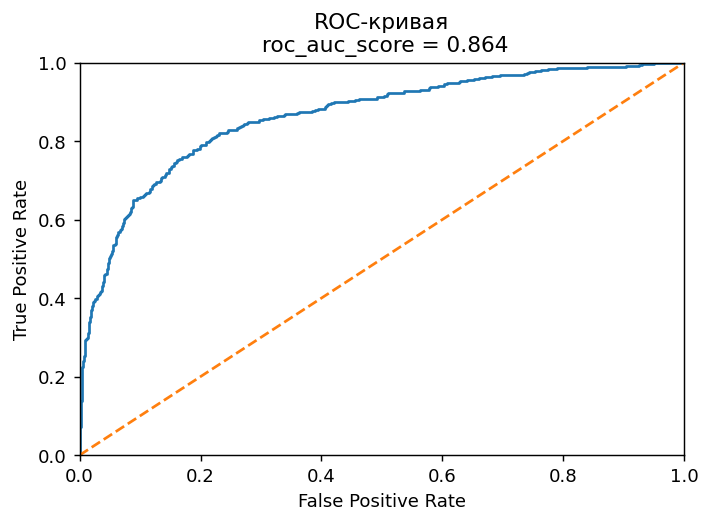

In [33]:
tpr, fpr, threshold = roc_curve(y_test, proba)

plt.figure( dpi=130)
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f'ROC-кривая\n roc_auc_score = {roc_auc:.3f}')
plt.show()

# Итог

 Был обработан датасет оттока клиентов из банка. Проверялись модели случайного леса и логистической регрессии. Выяснилось, что на f1_score и roc_auc_score сильно влияет балансировка класса, без нее не удалось бы достичь нужной отметки в 0.59. 

*  Качественные признаки были обработаны методом OHE, а количественные были масштабированы и сдвинуты при помощи стандартизации.


*  Сравнивались между собой три основных метода балансировки: встроенный метод, upsampling, downsampling.


*  Модель логистической регрессии не смогла превысить порог значения метрики f1 даже с балансировкой классов.


*  Для модели случайного леса в данной задаче оптимальной балансировкой классов является метод downsampling, т.е. уменьшение доминирующего класса.


*  На тестовой выборке лучшая модель достигла значения метрик **F-1 = 0.63**, **roc_auc = 0.864**. 
